In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Загрузить данные в pandas по url=https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv

In [2]:
dataset_url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
data = pd.read_csv(dataset_url, sep='\t')
data.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


#### 1. Вывести: кол-во наблюдений в датасете

In [3]:
print(len(data))

4622


#### 2. Вывести названия столбцов

In [4]:
print(*data.columns, sep=', ')

order_id, quantity, item_name, choice_description, item_price


#### 3. Определить самую частую позицию (item) в заказе 


In [5]:
data['item_name'].value_counts(normalize = True).index.tolist()[0]

'Chicken Bowl'

#### 4. Построить гистрограмму частоты заказов по позициям (item )

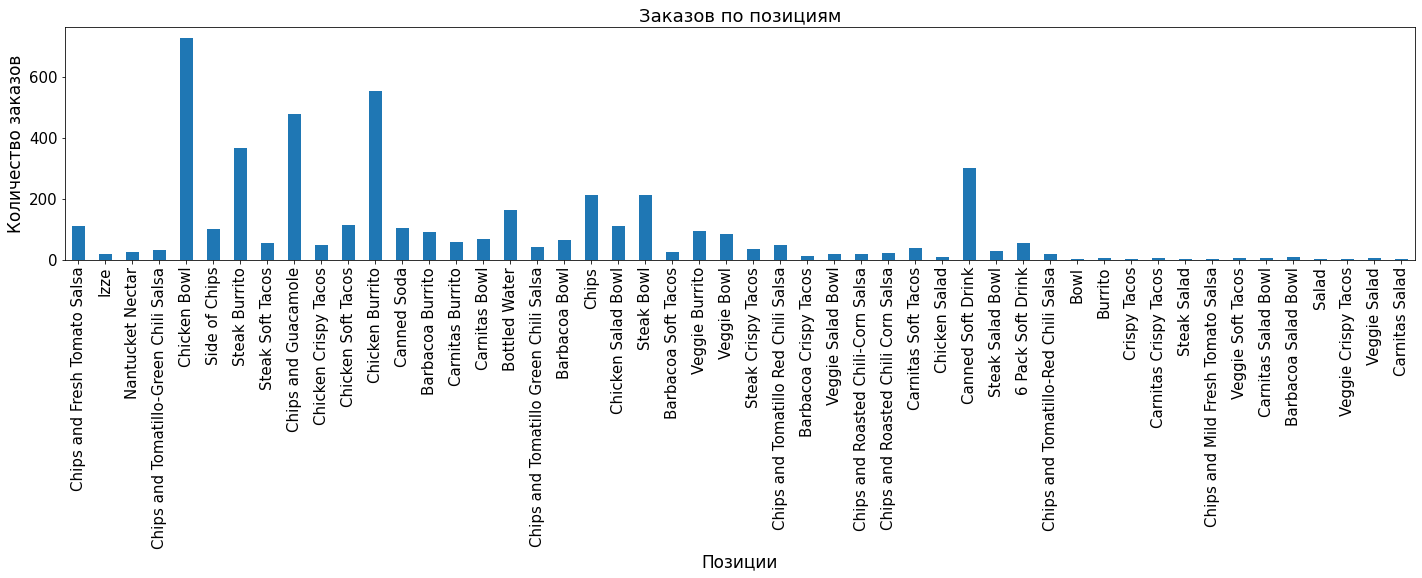

In [6]:
plt.rcParams['figure.figsize'] = (20, 8)
plt.rcParams['font.size'] = 15
group = data.groupby('item_name', sort=False).order_id.count().reset_index()

ax = group.plot(x='item_name', y="order_id", kind="bar", legend=False)
ax.set(xlabel="Позиции", ylabel = "Количество заказов")
ax.yaxis.label.set_size(17)
ax.xaxis.label.set_size(17)
plt.tight_layout()
plt.title('Заказов по позициям')
plt.show()

#### 5. Измените тип переменной item_price c с помощью лямбды функции

In [7]:
if data['item_price'].dtype != 'float64':
    data['item_price'] = data['item_price'].apply(lambda x: float(x[1:]))
print(data['item_price'].dtype)

float64


#### 6. Построить гистограмму кол-во денег заработанных по каждой позиции (item)

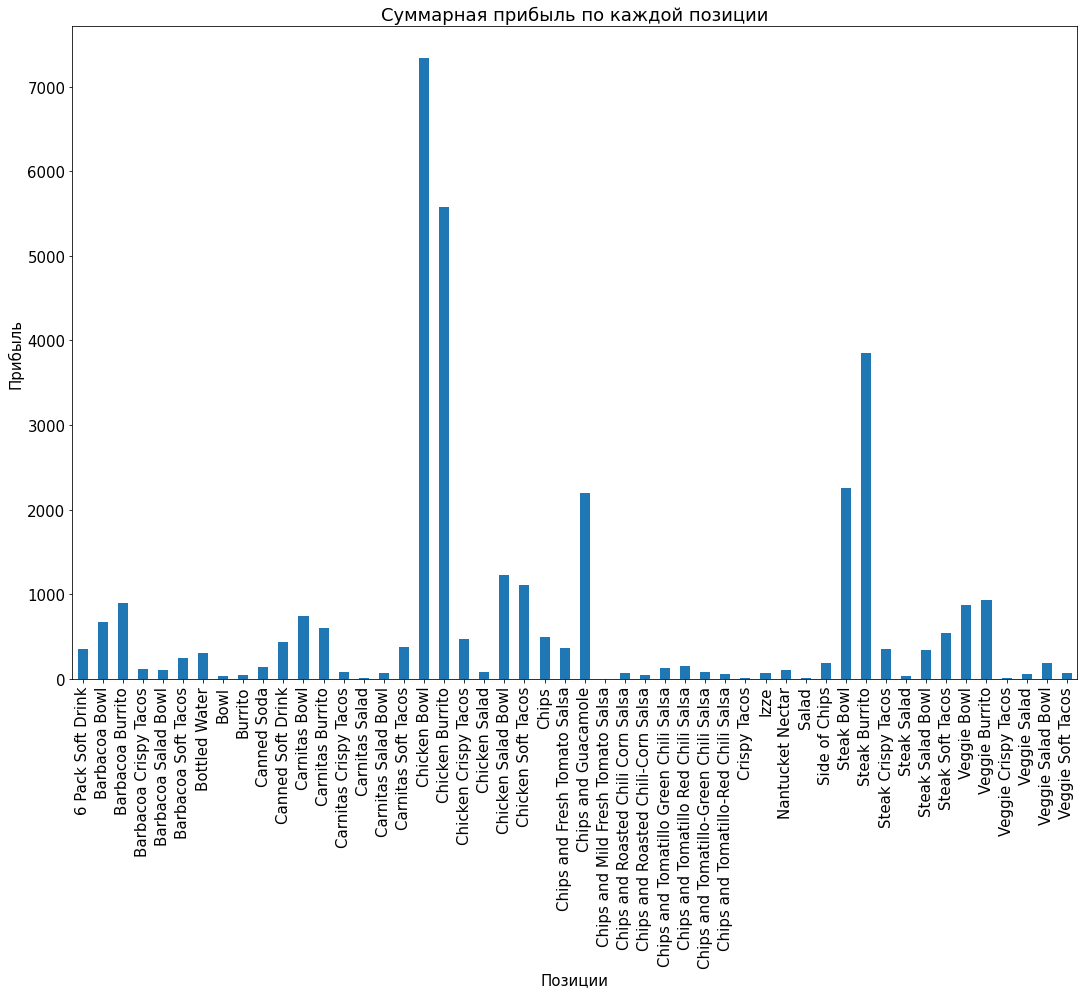

In [8]:
srs = data[['item_name', 'item_price']]
srs = srs.groupby('item_name').sum()

srs.plot(kind='bar', figsize=(18, 12), legend=False)
plt.xlabel('Позиции')
plt.ylabel('Прибыль')
plt.title('Суммарная прибыль по каждой позиции')
plt.show()

#### 7. Средняя сумма заказа? (минимум 2 способа)

In [9]:
#Первый способ
avg = data.groupby('order_id', sort=False).item_price.sum().mean()
print(f'${round(avg, 2)}')
#Второй способ
print(f'${round(data.item_price.sum() / data.order_id.nunique(), 2)}')
data.groupby('order_id', sort=False)

$18.81
$18.81


#### 8. Выведите среднее, минимальное и максимальное, медианное значения позиций в заказе


In [10]:
group = data.groupby('order_id', sort=False).item_name.nunique().reset_index()
group.agg(
    {
        'item_name': ['mean', 'min', 'max', 'median']
    }
)

,item_name
mean,2.34024
min,1.00000
max,8.00000
median,2.00000


#### 9. Определить статистику заказов стейков, а также статистику заказов прожарки.


In [11]:
steaks = data.loc[data['item_name'].str.contains('Steak')]
steaks.groupby('item_name')['quantity', 'item_price'].describe()

C:\Users\yuryp\AppData\Local\Temp/ipykernel_6472/3651748946.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  steaks.groupby('item_name')['quantity', 'item_price'].describe()


quantity                                               \
                      count      mean       std  min  25%  50%  75%  max   
item_name                                                                  
Steak Bowl            211.0  1.047393  0.234278  1.0  1.0  1.0  1.0  3.0   
Steak Burrito         368.0  1.048913  0.239889  1.0  1.0  1.0  1.0  3.0   
Steak Crispy Tacos     35.0  1.028571  0.169031  1.0  1.0  1.0  1.0  2.0   
Steak Salad             4.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0   
Steak Salad Bowl       29.0  1.068966  0.257881  1.0  1.0  1.0  1.0  2.0   
Steak Soft Tacos       55.0  1.018182  0.134840  1.0  1.0  1.0  1.0  2.0   

                   item_price                                                  \
                        count       mean       std   min    25%    50%    75%   
item_name                                                                       
Steak Bowl              211.0  10.711801  2.672417  8.69  9.250   9.25  11.75   
Steak Burrito           368.0  10.465842  2.571981  8.69  8.990   9.25  11.75   
Steak Crispy Tacos       35.0  10.209714  1.827732  8.69  9.120   9.25  11.75   
Steak Salad               4.0   8.915000  0.150000  8.69  8.915   8.99   8.99   
Steak Salad Bowl         29.0  11.847931  3.511170  9.39  9.390  11.89  11.89   
Steak Soft Tacos         55.0   9.746364  1.523743  8.99  9.120   9.25   9.25   

                           
                      max  
item_name                  
Steak Bowl          26.07  
Steak Burrito       27.75  
Steak Crispy Tacos  17.98  
Steak Salad          8.99  
Steak Salad Bowl    23.78  
Steak Soft Tacos    18.50

#### 10. Добавить новый столбец цен на каждую позицию в заказе в рублях.


In [12]:
data['item_price_rubles'] = round(data.item_price * 72.57, 2)
data.head()

,order_id,quantity,item_name,choice_description,item_price,item_price_rubles
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,173.44
1,1,1,Izze,[Clementine],3.39,246.01
2,1,1,Nantucket Nectar,[Apple],3.39,246.01
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,173.44
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,1232.24


#### 11. Сгруппировать заказы по входящим позициям в него.


In [13]:
group_by_items = data.groupby('order_id', sort=False).agg(
    {
        'item_name': lambda x: ", ".join(x),
        'item_price': np.sum,
        'quantity': np.sum
    }
)

group_by_items[['quantity', 'item_name', 'item_price']]

,quantity,item_name,item_price
order_id,,,
1,4,"Chips and Fresh Tomato Salsa, Izze, Nantucket ...",11.56
2,2,Chicken Bowl,16.98
3,2,"Chicken Bowl, Side of Chips",12.67
4,2,"Steak Burrito, Steak Soft Tacos",21.00
5,2,"Steak Burrito, Chips and Guacamole",13.70
...,...,...,...
1830,2,"Steak Burrito, Veggie Burrito",23.00
1831,3,"Carnitas Bowl, Chips, Bottled Water",12.90
1832,2,"Chicken Soft Tacos, Chips and Guacamole",13.20


Отдельно сгруппировать по стейкам во всех видах прожарках.

In [14]:
steaks.groupby('order_id').agg({'quantity':np.sum,
                                'item_name': lambda x: ", ".join(x), 
                                'item_price':np.sum})

,quantity,item_name,item_price
order_id,,,
4,2,"Steak Burrito, Steak Soft Tacos",21.00
5,1,Steak Burrito,9.25
16,1,Steak Burrito,8.99
20,1,Steak Burrito,11.75
21,1,Steak Burrito,8.99
...,...,...,...
1810,1,Steak Crispy Tacos,11.75
1818,1,Steak Salad Bowl,9.39
1829,1,Steak Burrito,11.75


#### 12. Определить цену по каждой позиции в отдельности. 


In [15]:
contains_and = data.item_name.str.contains('and')
data.loc[contains_and, ('price_for_one_item')] = round((data['item_price'] - 2.15) / data['quantity'], 2)
if not np.all(contains_and == False):
    data.loc[~contains_and, ('price_for_one_item')] = round(data['item_price'] / data['quantity'], 2)
data.loc[contains_and, ('item_name')] = data[contains_and]['item_name'].apply(lambda row: row[10:])

pr_for_1_item = data.groupby('item_name').price_for_one_item.agg('unique').reset_index()
pr_for_1_item["mean_price"] = pr_for_1_item["price_for_one_item"].apply(lambda row: round(np.mean(list(row)), 2))
pr_for_1_item[~pr_for_1_item.item_name.str.contains('and')]

,item_name,price_for_one_item,mean_price
0,6 Pack Soft Drink,[6.49],6.49
1,Barbacoa Bowl,"[11.75, 9.25, 8.99, 11.48, 8.69, 11.49]",10.28
2,Barbacoa Burrito,"[8.99, 9.25, 11.75, 11.08, 8.69, 11.48]",10.21
3,Barbacoa Crispy Tacos,"[11.75, 9.25, 11.48, 8.99]",10.37
4,Barbacoa Salad Bowl,"[11.89, 9.39]",10.64
5,Barbacoa Soft Tacos,"[9.25, 8.99, 11.75, 11.48]",10.37
6,Bottled Water,"[1.09, 1.5]",1.30
7,Bowl,[7.4],7.40
8,Burrito,[7.4],7.40
9,Canned Soda,[1.09],1.09


### Алгоритмы уменьшения размерности 

#### повторить эксперименты в главе 5.1 Qalitative Comparison of Multiple Algorithms статьи статьи UMAP: Uniform Manifold
#### Approximation and Projection for Dimension Reduction (https://arxiv.org/pdf/1802.03426.pdf)

#### необходимо воспроизвести все графики данной главы, соотнести выводы из статьи с вашими результатами.

Dataset: COIL20
Algorithm: UMAP
Time: 21.391176223754883

Dataset: MNIST
Algorithm: UMAP
Time: 96.97156238555908

Dataset: FMNIST
Algorithm: UMAP
Time: 90.11944890022278

Dataset: W2V
Algorithm: UMAP
Time: 32.24699950218201

Dataset: COIL20
Algorithm: TSNE
Time: 6.379169464111328

Dataset: MNIST
Algorithm: TSNE
Time: 874.6109981536865

Dataset: FMNIST
Algorithm: TSNE
Time: 842.5202827453613

Dataset: W2V
Algorithm: TSNE
Time: 300.2750005722046

Dataset: COIL20
Algorithm: PCA
Time: 1.9553394317626953

Dataset: MNIST
Algorithm: PCA
Time: 3.2780094146728516

Dataset: FMNIST
Algorithm: PCA
Time: 3.250995635986328

Dataset: W2V
Algorithm: PCA
Time: 0.6460003852844238



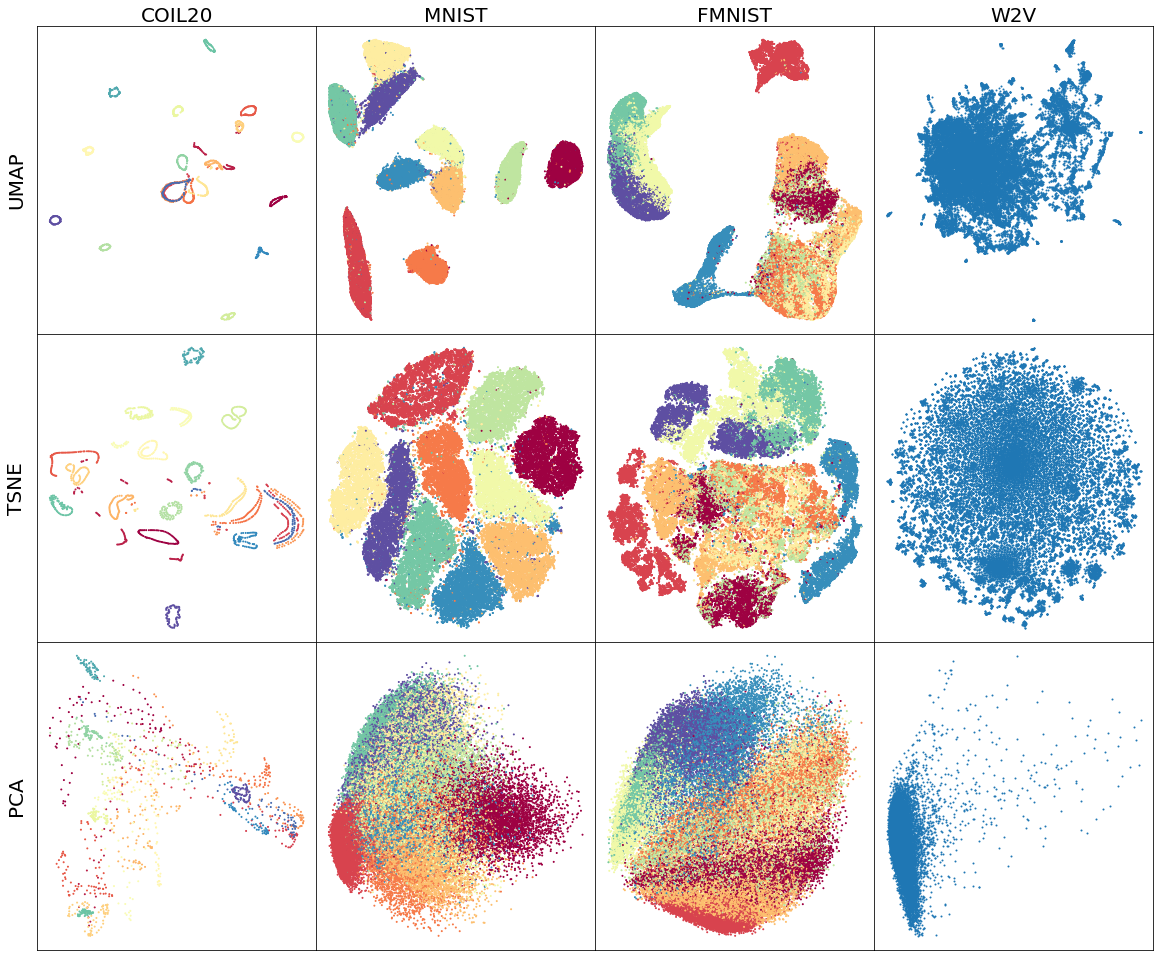

In [1]:
#Datasets:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import umap
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


datasets = (
    ('COIL20', np.load('coil-20.npz')['arr_0'].astype(np.float64), pd.read_csv('coil-20.csv')['label']),
    ('MNIST', np.load('mnist.npz')['arr_0'].astype(np.float64), pd.read_csv('mnist.csv')['label']),
    ('FMNIST', np.load('f-mnist.npz')['arr_0'].astype(np.float64), pd.read_csv('f-mnist.csv')['label']),
    ('W2V', np.load('word2vec.npz')['arr_0'][:30_000].astype(np.float64), None)
)

algorithms = (
    ('UMAP', umap.UMAP(random_state = 42)),
    ('TSNE', TSNE(random_state = 42, n_jobs = -1)),
    ('PCA', PCA(n_components = 2)),
)

rows = len(algorithms)
cols = len(datasets)

fig = plt.figure(figsize=(20, 17))
gs = fig.add_gridspec(rows, cols, hspace=0, wspace=0)
ax = gs.subplots()
 # 
for j in range(cols):
    ax[0, j].set_xlabel(datasets[j][0], fontsize=20)   
    ax[0, j].xaxis.set_label_position('top') 

for i in range(rows):
    ax[i, 0].set_ylabel(algorithms[i][0], fontsize=20)

for i in range(rows):
    alg_name = algorithms[i][0]
    alg = algorithms[i][1]

    for j in range(cols):
        dataset_name = datasets[j][0]
        dataset = datasets[j][1]
        labels = datasets[j][2]

        begin_time = time.time()
        reduced = alg.fit_transform(dataset)
        end_time = time.time()

        print("Dataset:", dataset_name)
        print("Algorithm:", alg_name)
        print("Time:", end_time - begin_time)
        print()

        ax[i, j].scatter(reduced[:, 0], reduced[:, 1], c=datasets[j][2], cmap='Spectral', s=1)
        ax[i, j].set_yticklabels([])
        ax[i, j].set_xticklabels([])
        ax[i, j].tick_params(left = False, bottom=False)
